#### Importing basic libraries

#### Problem Statement

* Build a predective model to predict the interest rate based on the previous data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [2]:
train=pd.read_csv(r"C:\Users\Vivek H M\Downloads\loan\train.csv")
test=pd.read_csv(r"C:\Users\Vivek H M\Downloads\loan\loan_data_test.csv")

In [3]:
train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Turn Over,CRIF Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,10.0,1000000,105000,17.33%,36 months,Agri Input Finance,11.93%,Tamilnadu,MORTGAGE,30000000,715-719,16,12113600,1.0,2 years
1,17.0,1080000,40000,15.75%,36 months,Agri Input Finance,3%,MH,RENT,1333340,760-764,4,264200,0.0,< 1 year
2,63.0,3700000,620000,23.99%,36 months,Corporate Receivable Finance,5.24%,Delhi,RENT,15000000,660-664,8,4475800,0.0,1 year
3,132.0,2475000,55000,18.91%,36 months,Inventory Finance,16.39%,Tamilnadu,MORTGAGE,7785500,690-694,11,1666400,2.0,3 years
4,224.0,4925000,183456,22.43%,36 months,Corporate Receivable Finance,12.81%,Delhi,MORTGAGE,20000000,675-679,14,6739600,0.0,8 years


In [4]:
test.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Turn Over,CRIF Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,39507,4000000,3995000,60 months,Invoice Finance,20.91%,Kerala,OWN,9833340,665-669,16,32137,2,10+ years
1,66166,4985000,4985000,60 months,Invoice Finance,8.51%,Kerala,MORTGAGE,10500000,710-714,7,15288,0,10+ years
2,5838,2200000,2190000,36 months,Corporate Receivable Finance,22.38%,Kerala,MORTGAGE,8400000,760-764,6,8694,4,7 years
3,100635,2540000,2540000,36 months,Invoice Finance,23.94%,Kerala,MORTGAGE,6666660,685-689,14,9655,3,NaN
4,26533,1000000,1000000,36 months,Agri Input Finance,8.51%,Kerala,MORTGAGE,7500000,745-749,12,3998,0,6 years


In [5]:
train.shape

(2200, 15)

In [6]:
test.shape

(300, 14)

In [7]:
train['coming_from']="train"
test['coming_from']="test"

In [8]:
all_data=pd.concat([train,test],axis=0)
all_data.shape

(2500, 16)

In [9]:
all_data.describe()

,ID,Turn Over,Inquiries.in.the.Last.6.Months
count,2499.000000,2.500000e+03,2497.000000
mean,51643.325330,1.142244e+07,0.906688
std,30053.637661,8.019295e+06,1.231149
min,10.000000,1.177000e+06,0.000000
25%,26570.500000,7.000000e+06,0.000000
50%,50673.000000,1.000000e+07,0.000000
75%,77583.000000,1.366616e+07,1.000000
max,104202.000000,2.055000e+08,9.000000


#### checking the datatypes of all the columns

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2499 non-null   object 
 2   Amount.Funded.By.Investors      2499 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Turn Over                       2500 non-null   int64  
 10  CRIF Range                      2500 non-null   object 
 11  Open.CREDIT.Lines               2496 non-null   object 
 12  Revolving.CREDIT.Balance        2497 non

In [11]:
# ID can be removed as it is not significant
# Amount requested & amount funded by investors should have been a numeric column but are in the object type 
# so have to convert it into numeric
# Interest rate column: have to remove % sign and convert it into numeric 
# Loan Length : convert it into numeric
# Loan Purpose : its a categorical data have to do encoding
# Debt to Income ratio: have to remove % sign and convert it into numeric
# State: encoding required
# Home Ownership: encoding required 
# Crif range, Open credit lines, Revolving Credit Balance & Employee length: convert it into numeric


In [12]:
all_data.drop(['ID'],axis=1,inplace=True)

In [13]:
all_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Turn Over,CRIF Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,coming_from
0,1000000,105000,17.33%,36 months,Agri Input Finance,11.93%,Tamilnadu,MORTGAGE,30000000,715-719,16,12113600,1.0,2 years,train
1,1080000,40000,15.75%,36 months,Agri Input Finance,3%,MH,RENT,1333340,760-764,4,264200,0.0,< 1 year,train
2,3700000,620000,23.99%,36 months,Corporate Receivable Finance,5.24%,Delhi,RENT,15000000,660-664,8,4475800,0.0,1 year,train
3,2475000,55000,18.91%,36 months,Inventory Finance,16.39%,Tamilnadu,MORTGAGE,7785500,690-694,11,1666400,2.0,3 years,train
4,4925000,183456,22.43%,36 months,Corporate Receivable Finance,12.81%,Delhi,MORTGAGE,20000000,675-679,14,6739600,0.0,8 years,train


In [14]:
# remove the % symbol from the interest rate and debt to income column by using replace method
# remove months from the Loan Length column by using replace method

all_data['Interest.Rate']=all_data['Interest.Rate'].str.replace("%", " ")
all_data['Debt.To.Income.Ratio']=all_data['Debt.To.Income.Ratio'].str.replace("%"," ")

In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   object 
 1   Amount.Funded.By.Investors      2499 non-null   object 
 2   Interest.Rate                   2200 non-null   object 
 3   Loan.Length                     2499 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Turn Over                       2500 non-null   int64  
 9   CRIF Range                      2500 non-null   object 
 10  Open.CREDIT.Lines               2496 non-null   object 
 11  Revolving.CREDIT.Balance        2497 non-null   object 
 12  Inquiries.in.the.Last.6.Months  2497 non

In [16]:
# create a function to convert the numeric cols from object data type to float

def get_non_numeric(series):
    non_numeric_elem=[]
    for i in series:
        try:
            float(i)
        except:
            non_numeric_elem+=i
    return non_numeric_elem
        

In [17]:
get_non_numeric(all_data['Interest.Rate'])

[]

In [18]:
for col in ['Amount.Requested','Amount.Funded.By.Investors','Interest.Rate','Debt.To.Income.Ratio','Open.CREDIT.Lines','Revolving.CREDIT.Balance']:
    non_numeric=get_non_numeric(all_data[col])
    print('*'*25)
    print("column: ", col)
    print('Non Numeric Elements: ', non_numeric)

*************************
column:  Amount.Requested
Non Numeric Elements:  ['.', '.', '.', '.']
*************************
column:  Amount.Funded.By.Investors
Non Numeric Elements:  ['.', '.', '.', '.']
*************************
column:  Interest.Rate
Non Numeric Elements:  []
*************************
column:  Debt.To.Income.Ratio
Non Numeric Elements:  []
*************************
column:  Open.CREDIT.Lines
Non Numeric Elements:  ['.', '.', '.', '.', '.']
*************************
column:  Revolving.CREDIT.Balance
Non Numeric Elements:  ['.', '.']


In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   object 
 1   Amount.Funded.By.Investors      2499 non-null   object 
 2   Interest.Rate                   2200 non-null   object 
 3   Loan.Length                     2499 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Turn Over                       2500 non-null   int64  
 9   CRIF Range                      2500 non-null   object 
 10  Open.CREDIT.Lines               2496 non-null   object 
 11  Revolving.CREDIT.Balance        2497 non-null   object 
 12  Inquiries.in.the.Last.6.Months  2497 non

In [20]:
# covertion to numeric data type
# Non numeric value will be replace with Nan ([".","."])

In [21]:
all_data['Interest.Rate']=pd.to_numeric(all_data['Interest.Rate'], errors='coerce')
all_data['Amount.Requested']=pd.to_numeric(all_data['Amount.Requested'], errors='coerce')
all_data['Amount.Funded.By.Investors']=pd.to_numeric(all_data['Amount.Funded.By.Investors'], errors='coerce')
all_data['Debt.To.Income.Ratio']=pd.to_numeric(all_data['Debt.To.Income.Ratio'], errors='coerce')
all_data['Open.CREDIT.Lines']=pd.to_numeric(all_data['Open.CREDIT.Lines'], errors='coerce')
all_data['Revolving.CREDIT.Balance']=pd.to_numeric(all_data['Revolving.CREDIT.Balance'], errors='coerce')

In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2495 non-null   float64
 1   Amount.Funded.By.Investors      2495 non-null   float64
 2   Interest.Rate                   2200 non-null   float64
 3   Loan.Length                     2499 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   float64
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Turn Over                       2500 non-null   int64  
 9   CRIF Range                      2500 non-null   object 
 10  Open.CREDIT.Lines               2491 non-null   float64
 11  Revolving.CREDIT.Balance        2495 non-null   float64
 12  Inquiries.in.the.Last.6.Months  2497 non

In [23]:
# converting crif range to numeric
print(all_data[['CRIF Range']])
k=all_data['CRIF Range'].str.split("-",expand=True)

    CRIF Range
0      715-719
1      760-764
2      660-664
3      690-694
4      675-679
..         ...
295    715-719
296    700-704
297    665-669
298    670-674
299    675-679

[2500 rows x 1 columns]


In [24]:
k.columns=['Min.Fico','Max.Fico']
k

,Min.Fico,Max.Fico
0,715,719
1,760,764
2,660,664
3,690,694
4,675,679
...,...,...
295,715,719
296,700,704
297,665,669
298,670,674


In [25]:
k.dtypes

Min.Fico    object
Max.Fico    object
dtype: object

In [26]:
k['Min.Fico']=pd.to_numeric(k['Min.Fico']) # converting to numeric col
k['Max.Fico']=pd.to_numeric(k['Max.Fico'])

In [27]:
k.dtypes

Min.Fico    int64
Max.Fico    int64
dtype: object

In [28]:
k['Avg.Fico']=(k['Min.Fico'] + k['Max.Fico'])/2

In [29]:
k

,Min.Fico,Max.Fico,Avg.Fico
0,715,719,717.0
1,760,764,762.0
2,660,664,662.0
3,690,694,692.0
4,675,679,677.0
...,...,...,...
295,715,719,717.0
296,700,704,702.0
297,665,669,667.0
298,670,674,672.0


In [30]:
all_data['Crif Score']=k['Avg.Fico']
all_data.drop(['CRIF Range'],axis=1, inplace=True)

In [31]:
all_data.head(2)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Turn Over,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,coming_from,Crif Score
0,1000000.0,105000.0,17.33,36 months,Agri Input Finance,11.93,Tamilnadu,MORTGAGE,30000000,16.0,12113600.0,1.0,2 years,train,717.0
1,1080000.0,40000.0,15.75,36 months,Agri Input Finance,3.00,MH,RENT,1333340,4.0,264200.0,0.0,< 1 year,train,762.0


In [32]:
## Imputing missing values

all_data.isnull().sum()

Amount.Requested                    5
Amount.Funded.By.Investors          5
Interest.Rate                     300
Loan.Length                         1
Loan.Purpose                        0
Debt.To.Income.Ratio                1
State                               0
Home.Ownership                      1
Turn Over                           0
Open.CREDIT.Lines                   9
Revolving.CREDIT.Balance            5
Inquiries.in.the.Last.6.Months      3
Employment.Length                  78
coming_from                         0
Crif Score                          0
dtype: int64

In [33]:
all_data[all_data['coming_from']=='train']['Home.Ownership'].value_counts()

Home.Ownership
MORTGAGE    1018
RENT         999
OWN          177
OTHER          4
NONE           1
Name: count, dtype: int64

In [34]:
all_data['Home.Ownership']=all_data['Home.Ownership'].fillna("MORTGAGE")

In [35]:
all_data.isnull().sum()

Amount.Requested                    5
Amount.Funded.By.Investors          5
Interest.Rate                     300
Loan.Length                         1
Loan.Purpose                        0
Debt.To.Income.Ratio                1
State                               0
Home.Ownership                      0
Turn Over                           0
Open.CREDIT.Lines                   9
Revolving.CREDIT.Balance            5
Inquiries.in.the.Last.6.Months      3
Employment.Length                  78
coming_from                         0
Crif Score                          0
dtype: int64

In [36]:
all_data['Home.Ownership']=all_data['Home.Ownership'].replace('OTHER','MORTGAGE')
all_data['Home.Ownership']=all_data['Home.Ownership'].replace('NONE','MORTGAGE')

In [37]:
all_data[all_data['coming_from']=='test']['Home.Ownership'].value_counts()

Home.Ownership
RENT        147
MORTGAGE    130
OWN          23
Name: count, dtype: int64

In [38]:
all_data[all_data['coming_from']=='train']['Home.Ownership'].value_counts()

Home.Ownership
MORTGAGE    1024
RENT         999
OWN          177
Name: count, dtype: int64

<Axes: xlabel='Loan.Purpose', ylabel='Interest.Rate'>

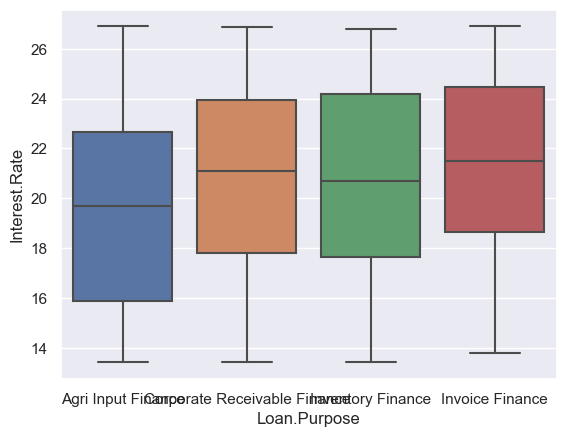

In [39]:
sns.boxplot(x=all_data[all_data['coming_from']=='train']['Loan.Purpose'], y=all_data[all_data['coming_from']=='train']['Interest.Rate'])

In [40]:
all_data.isnull().sum()

Amount.Requested                    5
Amount.Funded.By.Investors          5
Interest.Rate                     300
Loan.Length                         1
Loan.Purpose                        0
Debt.To.Income.Ratio                1
State                               0
Home.Ownership                      0
Turn Over                           0
Open.CREDIT.Lines                   9
Revolving.CREDIT.Balance            5
Inquiries.in.the.Last.6.Months      3
Employment.Length                  78
coming_from                         0
Crif Score                          0
dtype: int64

In [41]:
all_data['Amount.Requested']=all_data['Amount.Requested'].fillna(all_data[all_data['coming_from']=='train']['Amount.Requested'].median())
all_data['Amount.Funded.By.Investors']=all_data['Amount.Funded.By.Investors'].fillna(all_data[all_data['coming_from']=='train']['Amount.Requested'].median())
all_data['Loan.Length']=all_data['Loan.Length'].fillna('36 months')
all_data['Debt.To.Income.Ratio']=all_data['Debt.To.Income.Ratio'].fillna(all_data[all_data['coming_from']=='train']['Debt.To.Income.Ratio'].median())
all_data['Open.CREDIT.Lines']=all_data['Open.CREDIT.Lines'].fillna(all_data[all_data['coming_from']=='train']['Open.CREDIT.Lines'].median())
all_data['Debt.To.Income.Ratio']=all_data['Debt.To.Income.Ratio'].fillna(all_data[all_data['coming_from']=='train']['Debt.To.Income.Ratio'].median())
all_data['Revolving.CREDIT.Balance']=all_data['Revolving.CREDIT.Balance'].fillna(all_data[all_data['coming_from']=='train']['Revolving.CREDIT.Balance'].median())
all_data['Inquiries.in.the.Last.6.Months']=all_data['Inquiries.in.the.Last.6.Months'].fillna(all_data[all_data['coming_from']=='train']['Inquiries.in.the.Last.6.Months'].median())



In [42]:
all_data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Amount.Requested                2500 non-null   bool 
 1   Amount.Funded.By.Investors      2500 non-null   bool 
 2   Interest.Rate                   2500 non-null   bool 
 3   Loan.Length                     2500 non-null   bool 
 4   Loan.Purpose                    2500 non-null   bool 
 5   Debt.To.Income.Ratio            2500 non-null   bool 
 6   State                           2500 non-null   bool 
 7   Home.Ownership                  2500 non-null   bool 
 8   Turn Over                       2500 non-null   bool 
 9   Open.CREDIT.Lines               2500 non-null   bool 
 10  Revolving.CREDIT.Balance        2500 non-null   bool 
 11  Inquiries.in.the.Last.6.Months  2500 non-null   bool 
 12  Employment.Length               2500 non-null   bool 
 13  coming_fr

In [43]:
all_data.drop(['Employment.Length'],axis=1,inplace=True)

In [44]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2500 non-null   float64
 1   Amount.Funded.By.Investors      2500 non-null   float64
 2   Interest.Rate                   2200 non-null   float64
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2500 non-null   float64
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2500 non-null   object 
 8   Turn Over                       2500 non-null   int64  
 9   Open.CREDIT.Lines               2500 non-null   float64
 10  Revolving.CREDIT.Balance        2500 non-null   float64
 11  Inquiries.in.the.Last.6.Months  2500 non-null   float64
 12  coming_from                     2500 non

In [45]:
all_data['Loan.Length'].value_counts()

Loan.Length
36 months    1951
60 months     548
.               1
Name: count, dtype: int64

In [46]:
all_data['Loan.Length']=all_data['Loan.Length'].str.replace('.','36 months')

In [47]:
all_data['Loan.Length'].value_counts()

Loan.Length
36 months    1952
60 months     548
Name: count, dtype: int64

In [48]:
all_data['Loan.Purpose'].value_counts()

Loan.Purpose
Invoice Finance                 1307
Corporate Receivable Finance     494
Inventory Finance                351
Agri Input Finance               348
Name: count, dtype: int64

In [49]:
all_data['State'].value_counts()

State
MH           512
AP           433
Tamilnadu    375
Delhi        300
Gujarat      298
Karnataka    265
MP           208
Odisha        57
Kerala        51
.              1
Name: count, dtype: int64

In [50]:
all_data['State']=all_data['State'].str.replace('.','MH')

In [51]:
all_data['Home.Ownership'].value_counts()

Home.Ownership
MORTGAGE    1154
RENT        1146
OWN          200
Name: count, dtype: int64

In [52]:
col=all_data.select_dtypes(include='object').columns
col

Index(['Loan.Length', 'Loan.Purpose', 'State', 'Home.Ownership',
       'coming_from'],
      dtype='object')

In [53]:
# Encoding the categorical columns

df=pd.get_dummies(all_data, columns=['Loan.Purpose','Loan.Length','Home.Ownership','State'],dtype=int,drop_first=True)
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Turn Over,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,coming_from,Crif Score,...,Home.Ownership_OWN,Home.Ownership_RENT,State_Delhi,State_Gujarat,State_Karnataka,State_Kerala,State_MH,State_MP,State_Odisha,State_Tamilnadu
0,1000000.0,105000.0,17.33,11.93,30000000,16.0,12113600.0,1.0,train,717.0,...,0,0,0,0,0,0,0,0,0,1
1,1080000.0,40000.0,15.75,3.00,1333340,4.0,264200.0,0.0,train,762.0,...,0,1,0,0,0,0,1,0,0,0
2,3700000.0,620000.0,23.99,5.24,15000000,8.0,4475800.0,0.0,train,662.0,...,0,1,1,0,0,0,0,0,0,0
3,2475000.0,55000.0,18.91,16.39,7785500,11.0,1666400.0,2.0,train,692.0,...,0,0,0,0,0,0,0,0,0,1
4,4925000.0,183456.0,22.43,12.81,20000000,14.0,6739600.0,0.0,train,677.0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 299
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Amount.Requested                           2500 non-null   float64
 1   Amount.Funded.By.Investors                 2500 non-null   float64
 2   Interest.Rate                              2200 non-null   float64
 3   Debt.To.Income.Ratio                       2500 non-null   float64
 4   Turn Over                                  2500 non-null   int64  
 5   Open.CREDIT.Lines                          2500 non-null   float64
 6   Revolving.CREDIT.Balance                   2500 non-null   float64
 7   Inquiries.in.the.Last.6.Months             2500 non-null   float64
 8   coming_from                                2500 non-null   object 
 9   Crif Score                                 2500 non-null   float64
 10  Loan.Purpose_Corporate Receiva

In [55]:
train=df[all_data['coming_from']=='train']
test=df[all_data['coming_from']=='test']
train.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Turn Over,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,coming_from,Crif Score,...,Home.Ownership_OWN,Home.Ownership_RENT,State_Delhi,State_Gujarat,State_Karnataka,State_Kerala,State_MH,State_MP,State_Odisha,State_Tamilnadu
0,1000000.0,105000.0,17.33,11.93,30000000,16.0,12113600.0,1.0,train,717.0,...,0,0,0,0,0,0,0,0,0,1
1,1080000.0,40000.0,15.75,3.00,1333340,4.0,264200.0,0.0,train,762.0,...,0,1,0,0,0,0,1,0,0,0
2,3700000.0,620000.0,23.99,5.24,15000000,8.0,4475800.0,0.0,train,662.0,...,0,1,1,0,0,0,0,0,0,0
3,2475000.0,55000.0,18.91,16.39,7785500,11.0,1666400.0,2.0,train,692.0,...,0,0,0,0,0,0,0,0,0,1
4,4925000.0,183456.0,22.43,12.81,20000000,14.0,6739600.0,0.0,train,677.0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
train.drop(['coming_from'],axis=1,inplace=True)

In [57]:
## EDA

<Axes: xlabel='Turn Over', ylabel='Count'>

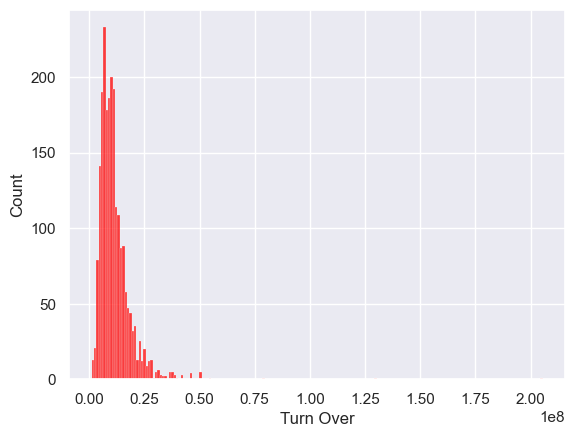

In [58]:
sns.histplot(train['Turn Over'],color='red')

<Axes: xlabel='Open.CREDIT.Lines', ylabel='Count'>

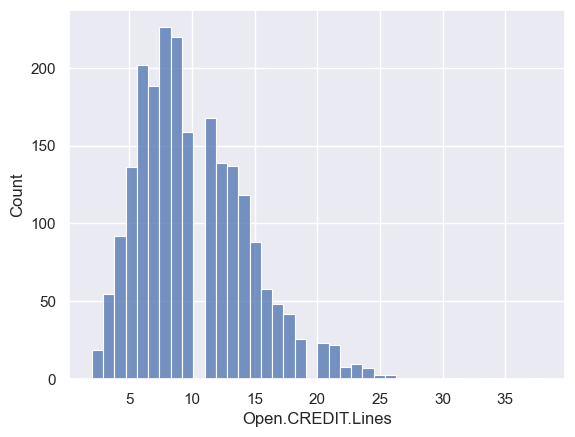

In [59]:
sns.histplot(train['Open.CREDIT.Lines'])

<Axes: xlabel='Loan.Length', ylabel='Interest.Rate'>

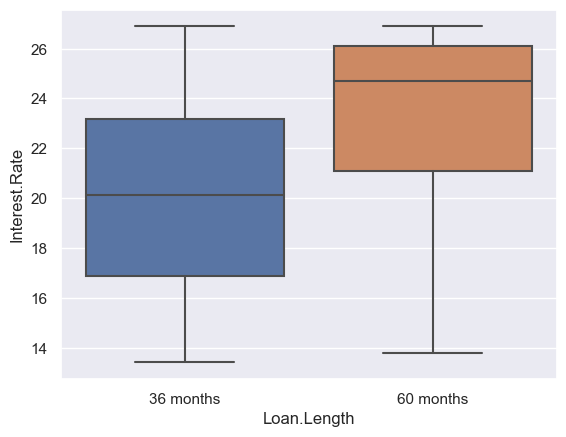

In [60]:
sns.boxplot(y=all_data[all_data['coming_from']=='train']['Interest.Rate'], x=all_data[all_data['coming_from']=='train']['Loan.Length'])

#### from the above we can say that interest rate is higher for 60 months tenure compared to 36 months

<Axes: xlabel='Loan.Purpose', ylabel='Interest.Rate'>

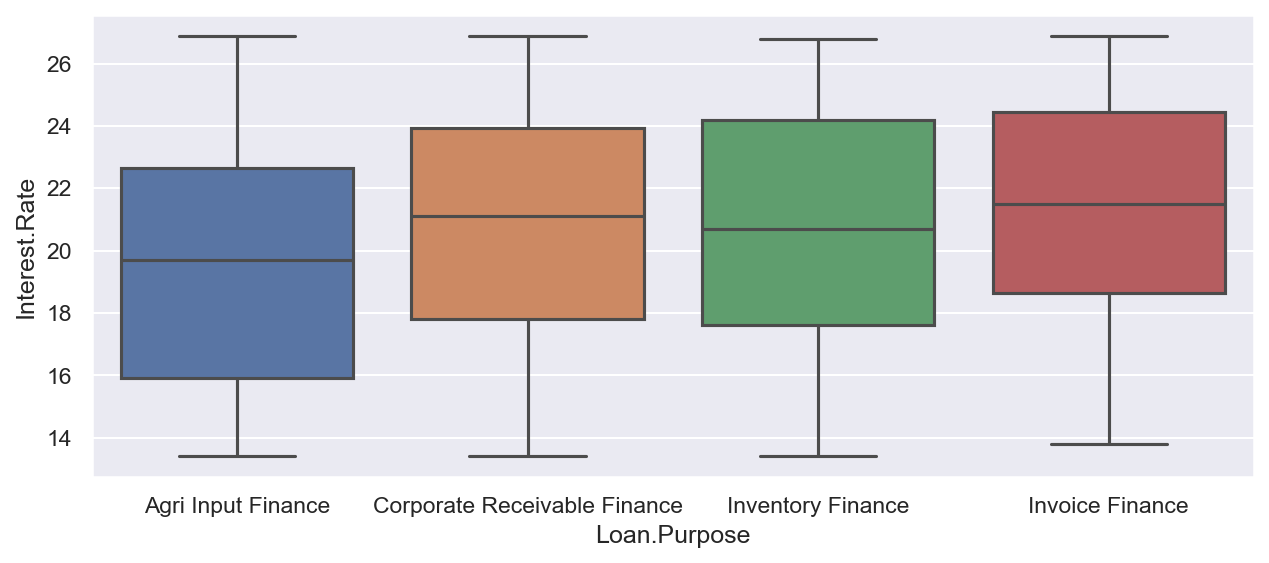

In [61]:
plt.figure(figsize=(10,4),dpi=150)
sns.boxplot(y=all_data[all_data['coming_from']=='train']['Interest.Rate'], x=all_data[all_data['coming_from']=='train']['Loan.Purpose'])


<Axes: xlabel='Loan.Purpose', ylabel='Amount.Funded.By.Investors'>

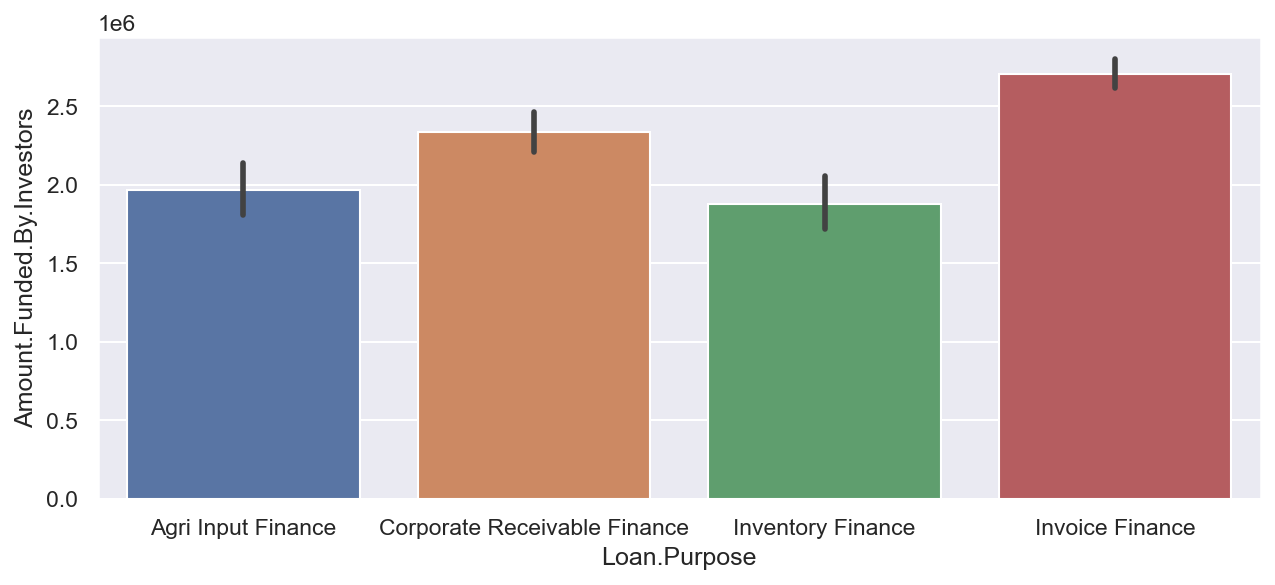

In [62]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(y=all_data[all_data['coming_from']=='train']['Amount.Funded.By.Investors'], x=all_data[all_data['coming_from']=='train']['Loan.Purpose'])

In [63]:
all_data[all_data['coming_from']=='train'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2200 non-null   float64
 1   Amount.Funded.By.Investors      2200 non-null   float64
 2   Interest.Rate                   2200 non-null   float64
 3   Loan.Length                     2200 non-null   object 
 4   Loan.Purpose                    2200 non-null   object 
 5   Debt.To.Income.Ratio            2200 non-null   float64
 6   State                           2200 non-null   object 
 7   Home.Ownership                  2200 non-null   object 
 8   Turn Over                       2200 non-null   int64  
 9   Open.CREDIT.Lines               2200 non-null   float64
 10  Revolving.CREDIT.Balance        2200 non-null   float64
 11  Inquiries.in.the.Last.6.Months  2200 non-null   float64
 12  coming_from                     2200 no

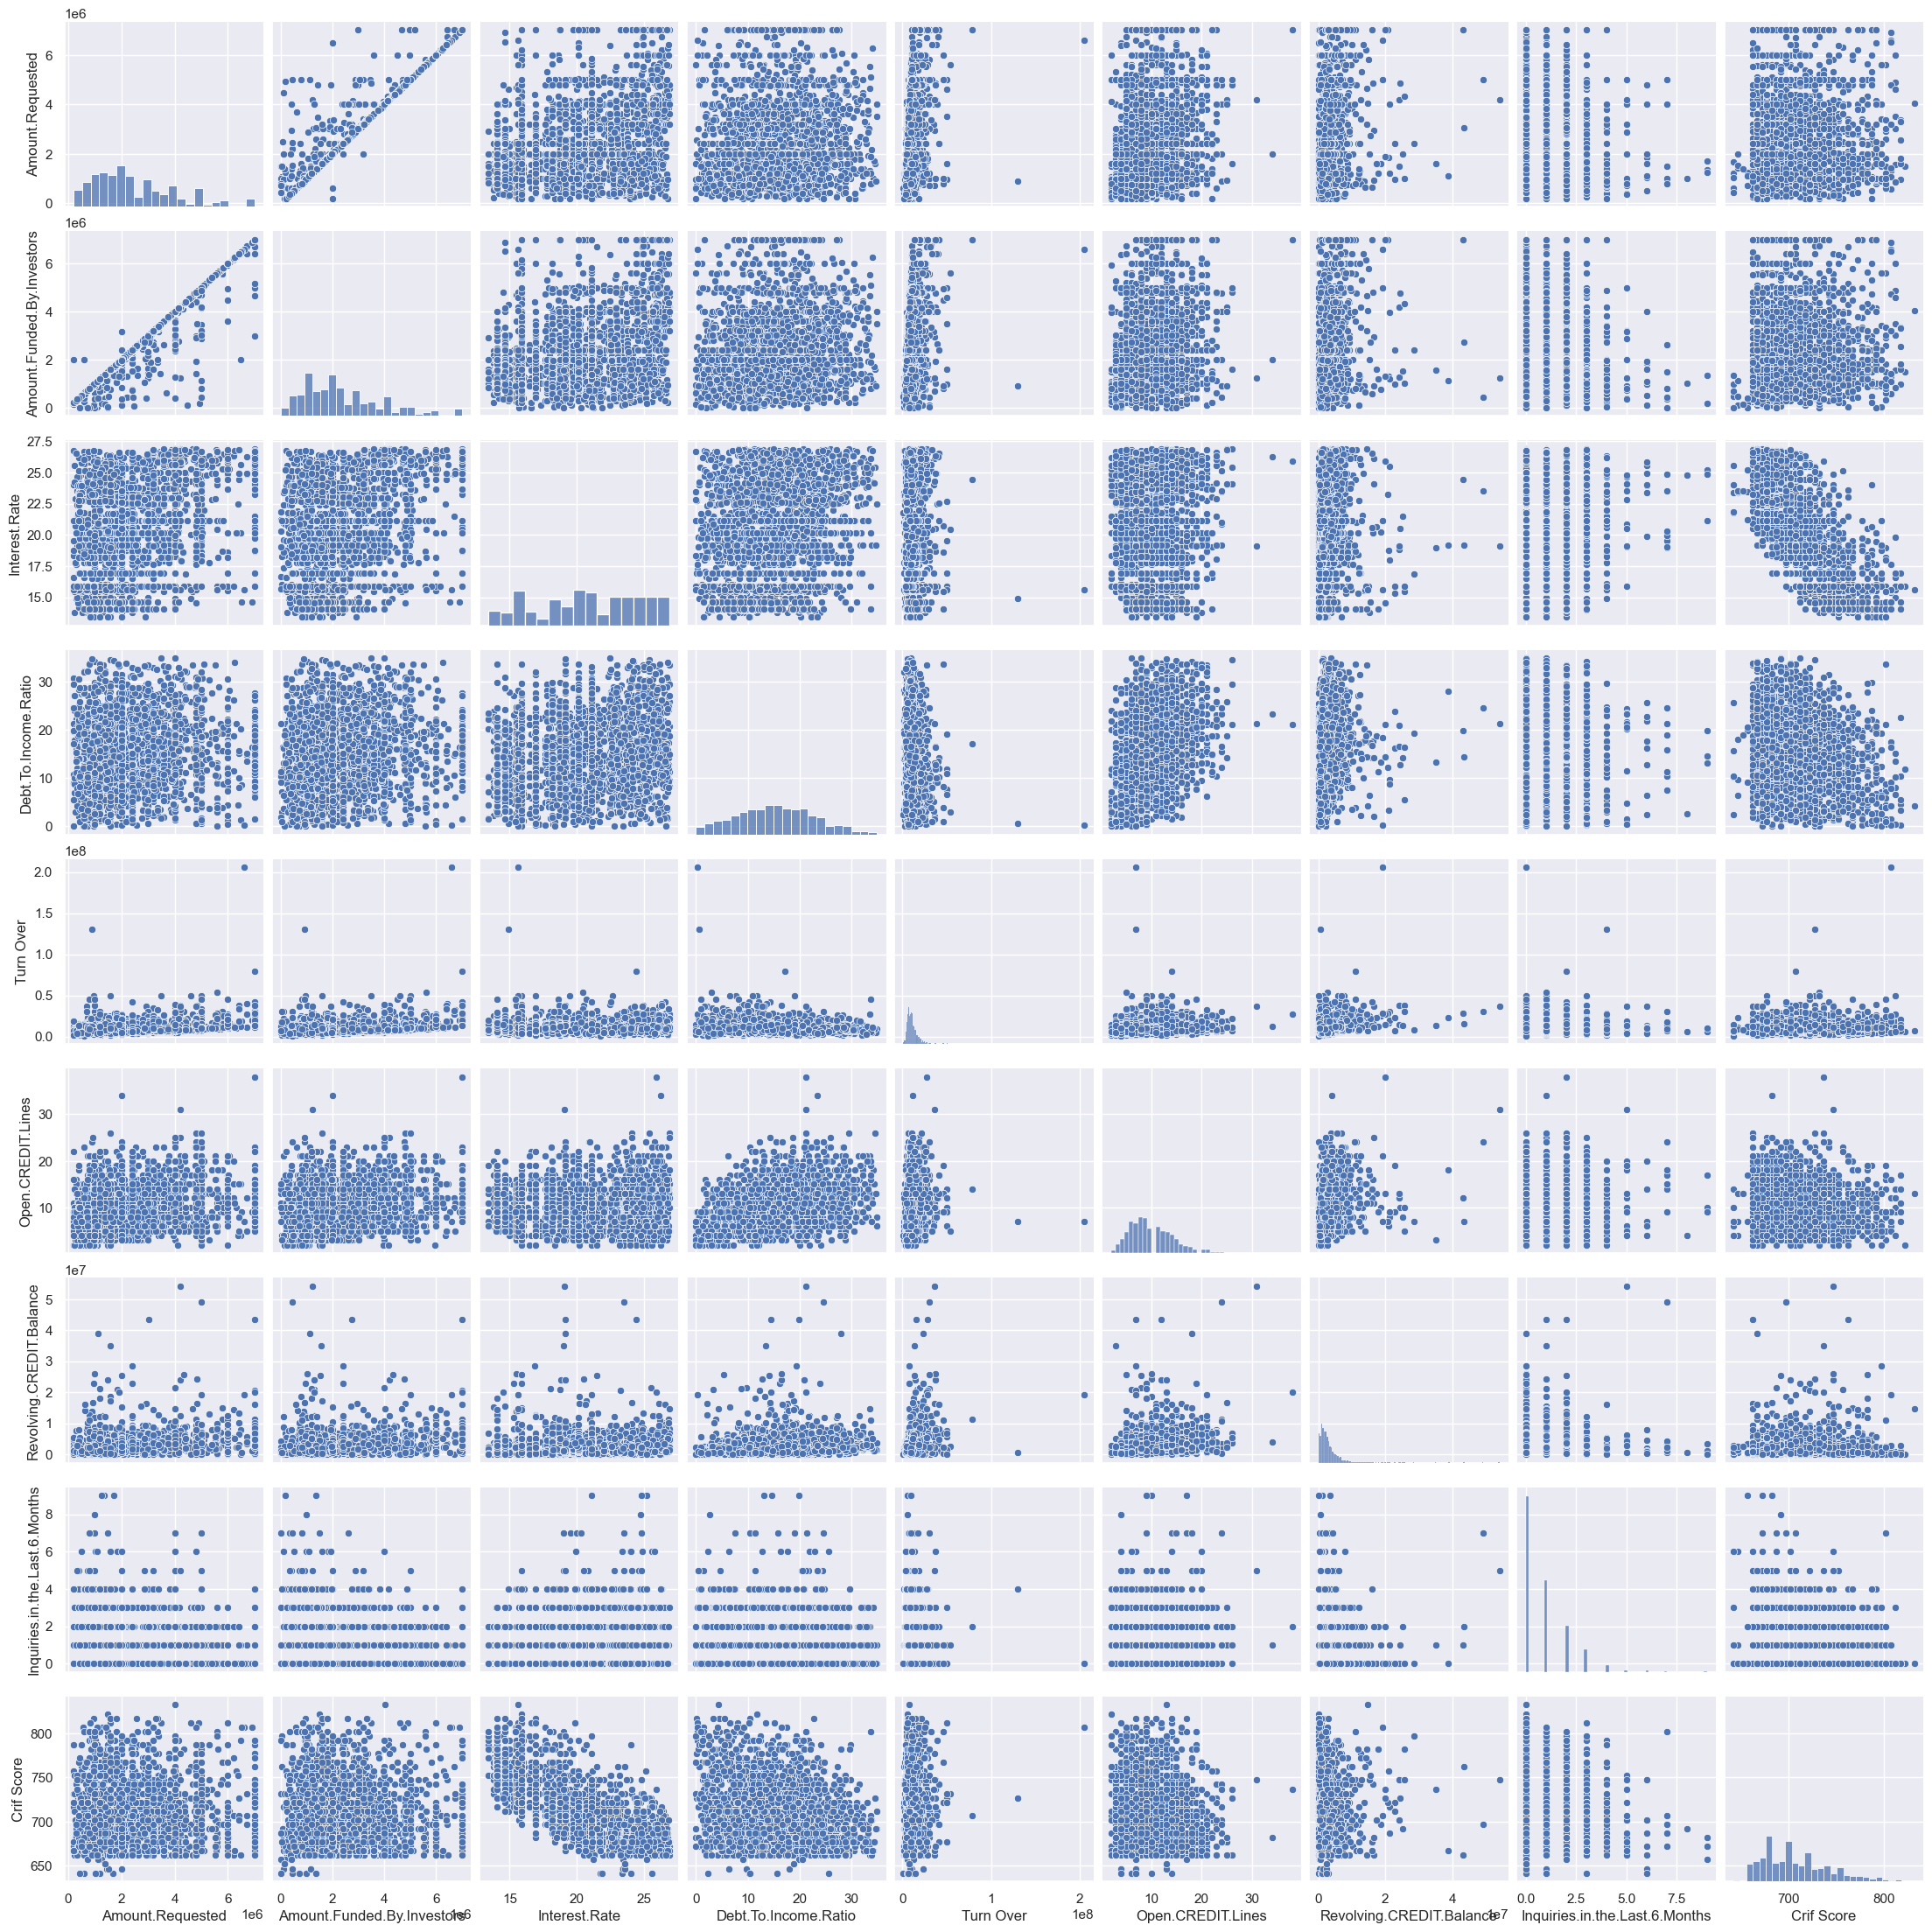

In [64]:
sns.pairplot(all_data[all_data['coming_from']=='train'],palette='muted')

In [65]:
numeric_cols= ['Amount.Requested',
'Amount.Funded.By.Investors',
'Interest.Rate',
'Debt.To.Income.Ratio',
'Turn Over',
'Open.CREDIT.Lines',
'Revolving.CREDIT.Balance',
'Inquiries.in.the.Last.6.Months',
'Crif Score']

In [66]:
numeric_col=all_data[all_data['coming_from']=='train'].select_dtypes(exclude='object')
numeric_col

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Turn Over,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Crif Score
0,1000000.0,105000.0,17.33,11.93,30000000,16.0,12113600.0,1.0,717.0
1,1080000.0,40000.0,15.75,3.00,1333340,4.0,264200.0,0.0,762.0
2,3700000.0,620000.0,23.99,5.24,15000000,8.0,4475800.0,0.0,662.0
3,2475000.0,55000.0,18.91,16.39,7785500,11.0,1666400.0,2.0,692.0
4,4925000.0,183456.0,22.43,12.81,20000000,14.0,6739600.0,0.0,677.0
...,...,...,...,...,...,...,...,...,...
2195,2000000.0,1975000.0,22.58,16.40,4500000,3.0,2679600.0,4.0,682.0
2196,1900000.0,1300000.0,14.54,14.43,15000000,13.0,20046600.0,0.0,727.0
2197,1600000.0,1600000.0,23.44,6.29,9666660,8.0,1935200.0,4.0,677.0
2198,1600000.0,1600000.0,24.01,2.38,10583340,4.0,250400.0,6.0,702.0


In [67]:
corr=numeric_col.corr()
corr

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Turn Over,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Crif Score
Amount.Requested,1.000000,0.966098,0.285507,0.073094,0.372977,0.194951,0.280278,-0.013203,0.083624
Amount.Funded.By.Investors,0.966098,1.000000,0.286708,0.087137,0.356238,0.185464,0.247859,-0.055585,0.072549
Interest.Rate,0.285507,0.286708,1.000000,0.183818,-0.022503,0.075887,0.049339,0.182315,-0.739163
Debt.To.Income.Ratio,0.073094,0.087137,0.183818,1.000000,-0.164974,0.369016,0.180818,0.010945,-0.225485
Turn Over,0.372977,0.356238,-0.022503,-0.164974,1.000000,0.169900,0.351366,0.039023,0.132528
Open.CREDIT.Lines,0.194951,0.185464,0.075887,0.369016,0.169900,1.000000,0.286123,0.111706,-0.091026
Revolving.CREDIT.Balance,0.280278,0.247859,0.049339,0.180818,0.351366,0.286123,1.000000,0.025595,-0.000326
Inquiries.in.the.Last.6.Months,-0.013203,-0.055585,0.182315,0.010945,0.039023,0.111706,0.025595,1.000000,-0.091786
Crif Score,0.083624,0.072549,-0.739163,-0.225485,0.132528,-0.091026,-0.000326,-0.091786,1.000000


<Axes: >

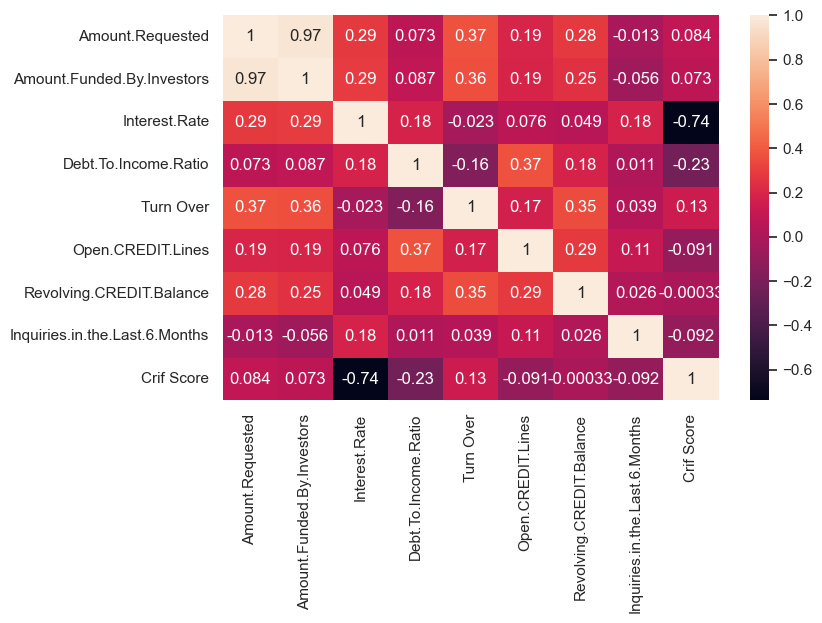

In [68]:
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True)

In [69]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    
    return lower_range, upper_range

In [70]:
remove_outlier(train['Amount.Requested'])

(-2100000.0, 6700000.0)

In [71]:
test.drop(['coming_from','Interest.Rate'],axis=1,inplace=True)

In [72]:
test.shape, train.shape

((300, 22), (2200, 23))

## Modelling

In [73]:
x=train.drop(['Interest.Rate'],axis=1)
y=train['Interest.Rate']

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1760, 22) (440, 22) (1760,) (440,)


In [75]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [76]:
print(model.intercept_)
print(model.coef_)

75.76518537742199
[ 3.11012710e-07  3.53790561e-07  4.08551148e-03 -1.24476761e-08
 -4.02976771e-02 -1.96480752e-08  3.71000504e-01 -7.99413075e-02
 -3.21789891e-01  2.45984655e-01 -2.48472167e-01  2.51775399e+00
  1.75788996e-01  8.01434066e-02 -1.13739922e-01 -2.89955779e-01
 -3.26901391e-01 -4.81273573e-02 -1.85062822e-01 -1.34109099e-01
  3.24674610e-01  4.73311505e-02]


In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [78]:
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
MAPE=mean_absolute_percentage_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)

In [79]:
print('MSE: ', MSE)
print('MAE: ', MAE)
print('MAPE: ', MAPE)
print('r2_score: ', r2_score)


MSE:  3.389338136007963
MAE:  1.448352480865796
MAPE:  0.0742900512017368
r2_score:  0.7613209066146729


In [80]:
## Method 2: By using normalised data

In [81]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x_scaled=scaled.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [82]:
x_scaled

,Amount.Requested,Amount.Funded.By.Investors,Debt.To.Income.Ratio,Turn Over,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Crif Score,Loan.Purpose_Corporate Receivable Finance,Loan.Purpose_Inventory Finance,...,Home.Ownership_OWN,Home.Ownership_RENT,State_Delhi,State_Gujarat,State_Karnataka,State_Kerala,State_MH,State_MP,State_Odisha,State_Tamilnadu
0,-0.954586,-1.486936,-0.457763,2.242986,1.318826,2.419839,0.084302,0.252896,-0.499290,-0.404995,...,-0.295794,-0.912034,-0.375605,-0.366088,-0.346645,-0.139508,-0.504967,-0.303004,-0.160128,2.393288
1,-0.903613,-1.528780,-1.645728,-1.233325,-1.353649,-0.749061,-0.736335,1.529305,-0.499290,-0.404995,...,-0.295794,1.096450,-0.375605,-0.366088,-0.346645,-0.139508,1.980328,-0.303004,-0.160128,-0.417835
2,0.765781,-1.155405,-1.347739,0.423986,-0.462824,0.377252,-0.736335,-1.307158,2.002845,-0.404995,...,-0.295794,1.096450,2.662374,-0.366088,-0.346645,-0.139508,-0.504967,-0.303004,-0.160128,-0.417835
3,-0.014756,-1.519123,0.135553,-0.450893,0.205295,-0.374069,0.904939,-0.456219,-0.499290,2.469165,...,-0.295794,-0.912034,-0.375605,-0.366088,-0.346645,-0.139508,-0.504967,-0.303004,-0.160128,2.393288
4,1.546317,-1.436430,-0.340696,1.030319,0.873414,0.982663,-0.736335,-0.881689,2.002845,-0.404995,...,-0.295794,-0.912034,2.662374,-0.366088,-0.346645,-0.139508,-0.504967,-0.303004,-0.160128,-0.417835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,-0.317414,-0.283124,0.136884,-0.849314,-1.576355,-0.103108,2.546213,-0.739866,-0.499290,2.469165,...,-0.295794,1.096450,-0.375605,-0.366088,-0.346645,-0.139508,-0.504967,-0.303004,-0.160128,2.393288
2196,-0.381131,-0.717655,-0.125187,0.423986,0.650707,4.541371,-0.736335,0.536543,2.002845,-0.404995,...,-0.295794,-0.912034,-0.375605,2.731582,-0.346645,-0.139508,-0.504967,-0.303004,-0.160128,-0.417835
2197,-0.572283,-0.524530,-1.208057,-0.222771,-0.462824,-0.302184,2.546213,-0.881689,2.002845,-0.404995,...,-0.295794,-0.912034,-0.375605,2.731582,-0.346645,-0.139508,-0.504967,-0.303004,-0.160128,-0.417835
2198,-0.572283,-0.524530,-1.728207,-0.111608,-1.353649,-0.752752,4.187487,-0.172573,-0.499290,-0.404995,...,-0.295794,1.096450,-0.375605,-0.366088,-0.346645,-0.139508,1.980328,-0.303004,-0.160128,-0.417835


In [83]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_scaled,y,test_size=0.2, random_state=101)

In [84]:
lm=LinearRegression()
lm.fit(x_train_s,y_train_s)
y_pred_s=lm.predict(x_test_s)

In [85]:
MSE_S=mean_squared_error(y_test_s,y_pred_s)
MAE_S=mean_absolute_error(y_test_s,y_pred_s)
MAPE_S=mean_absolute_percentage_error(y_test_s,y_pred_s)


In [86]:
print('MSE: ', MSE_S)
print('MAE: ', MAE_S)
print('MAPE: ', MAPE_S)


MSE:  3.3893381360093304
MAE:  1.4483524808659711
MAPE:  0.07429005120174471


In [87]:
## Using Min Max Scaler


In [88]:
from sklearn.preprocessing import MinMaxScaler
scaled1=MinMaxScaler()
x_scaled1=scaled1.fit_transform(x)
x_scaled1=pd.DataFrame(x_scaled1,columns=x.columns)

In [89]:
x_scaled1

,Amount.Requested,Amount.Funded.By.Investors,Debt.To.Income.Ratio,Turn Over,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Crif Score,Loan.Purpose_Corporate Receivable Finance,Loan.Purpose_Inventory Finance,...,Home.Ownership_OWN,Home.Ownership_RENT,State_Delhi,State_Gujarat,State_Karnataka,State_Kerala,State_MH,State_MP,State_Odisha,State_Tamilnadu
0,0.117647,0.015000,0.341736,0.141066,0.388889,0.223663,0.111111,0.394737,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.129412,0.005715,0.085935,0.000765,0.055556,0.004878,0.000000,0.631579,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.514706,0.088572,0.150100,0.067653,0.166667,0.082640,0.000000,0.105263,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.334559,0.007857,0.469493,0.032343,0.250000,0.030768,0.222222,0.263158,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.694853,0.026208,0.366944,0.092124,0.333333,0.124439,0.000000,0.184211,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0.264706,0.282143,0.469779,0.016263,0.027778,0.049476,0.444444,0.210526,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2196,0.250000,0.185715,0.413349,0.067653,0.305556,0.370137,0.000000,0.447368,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2197,0.205882,0.228572,0.180178,0.041550,0.166667,0.035731,0.444444,0.184211,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2198,0.205882,0.228572,0.068175,0.046037,0.055556,0.004623,0.666667,0.315789,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [90]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_scaled1,y,test_size=0.2, random_state=101)

In [91]:
lm=LinearRegression()
lm.fit(x_train_m,y_train_m)
y_pred_m=lm.predict(x_test_m)

In [92]:
MSE_M=mean_squared_error(y_test_m,y_pred_m)
MAE_M=mean_absolute_error(y_test_m,y_pred_m)
MAPE_M=mean_absolute_percentage_error(y_test_m,y_pred_m)


In [93]:
print('MSE: ', MSE_S)
print('MAE: ', MAE_S)
print('MAPE: ', MAPE_S)


MSE:  3.3893381360093304
MAE:  1.4483524808659711
MAPE:  0.07429005120174471


In [94]:
# Treating the oultilers 

In [99]:
def remove_out(col):
    sorted(col)
    Q3, Q1 = col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

In [112]:
def box(col):
    print(col)
    sns.boxplot(x[col])
    plt.xlabel(col)
    plt.show()

In [125]:
col=x.columns
col


Index(['Amount.Requested', 'Debt.To.Income.Ratio', 'Turn Over',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Crif Score',
       'Loan.Purpose_Corporate Receivable Finance',
       'Loan.Purpose_Inventory Finance', 'Loan.Purpose_Invoice Finance',
       'Loan.Length_60 months', 'Home.Ownership_OWN', 'Home.Ownership_RENT',
       'State_Delhi', 'State_Gujarat', 'State_Karnataka', 'State_Kerala',
       'State_MH', 'State_MP', 'State_Odisha', 'State_Tamilnadu'],
      dtype='object')

In [115]:
x.drop(['Amount.Funded.By.Investors'],axis=1,inplace = True)

In [117]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled,y,test_size=0.2, random_state=101)


In [119]:
lm=LinearRegression()
lm.fit(x_train1,y_train1)
y_pred1=lm.predict(x_test1)

In [122]:
MSE1=mean_squared_error(y_test1,y_pred1)
MAE2=mean_absolute_error(y_test1,y_pred1)
MAPE3=mean_absolute_percentage_error(y_test1,y_pred1)



In [123]:
print('MSE: ', MSE1)
print('MAE: ', MAE2)
print('MAPE: ', MAPE3)


MSE:  3.3893381360093304
MAE:  1.4483524808659711
MAPE:  0.07429005120174471


In [124]:
x

,Amount.Requested,Debt.To.Income.Ratio,Turn Over,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Crif Score,Loan.Purpose_Corporate Receivable Finance,Loan.Purpose_Inventory Finance,Loan.Purpose_Invoice Finance,...,Home.Ownership_OWN,Home.Ownership_RENT,State_Delhi,State_Gujarat,State_Karnataka,State_Kerala,State_MH,State_MP,State_Odisha,State_Tamilnadu
0,1000000.0,11.93,30000000,16.0,12113600.0,1.0,717.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1080000.0,3.00,1333340,4.0,264200.0,0.0,762.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,3700000.0,5.24,15000000,8.0,4475800.0,0.0,662.0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
3,2475000.0,16.39,7785500,11.0,1666400.0,2.0,692.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,4925000.0,12.81,20000000,14.0,6739600.0,0.0,677.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2000000.0,16.40,4500000,3.0,2679600.0,4.0,682.0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2196,1900000.0,14.43,15000000,13.0,20046600.0,0.0,727.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2197,1600000.0,6.29,9666660,8.0,1935200.0,4.0,677.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2198,1600000.0,2.38,10583340,4.0,250400.0,6.0,702.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


Amount.Requested


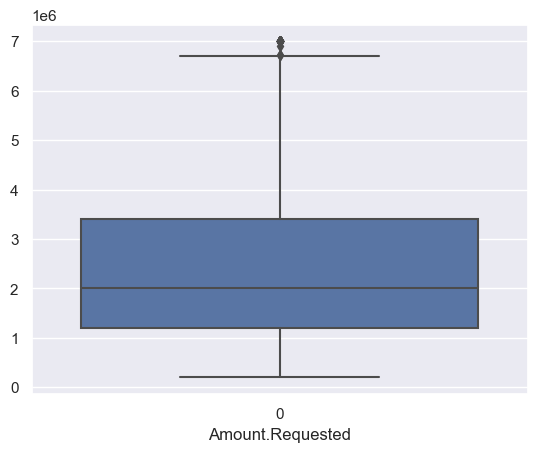

Debt.To.Income.Ratio


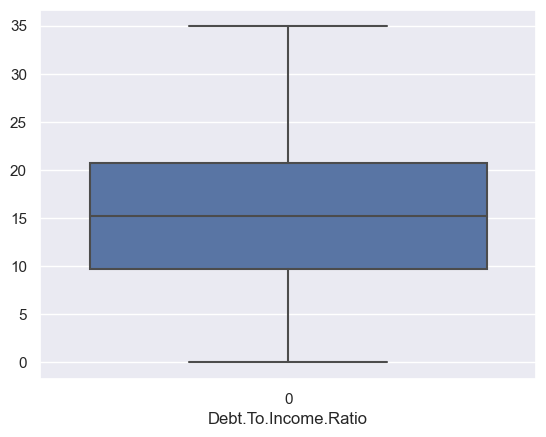

Turn Over


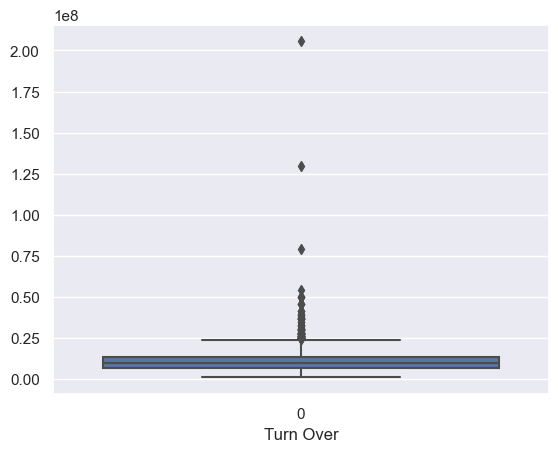

Open.CREDIT.Lines


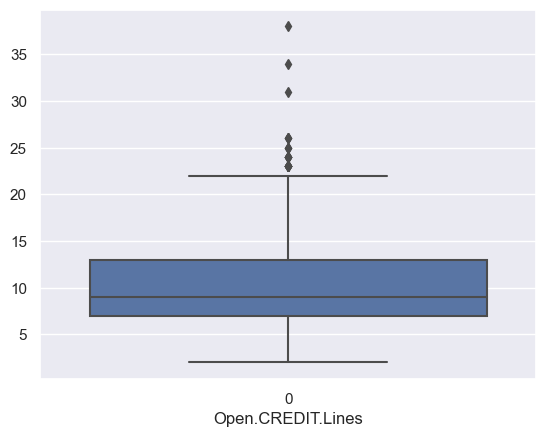

Revolving.CREDIT.Balance


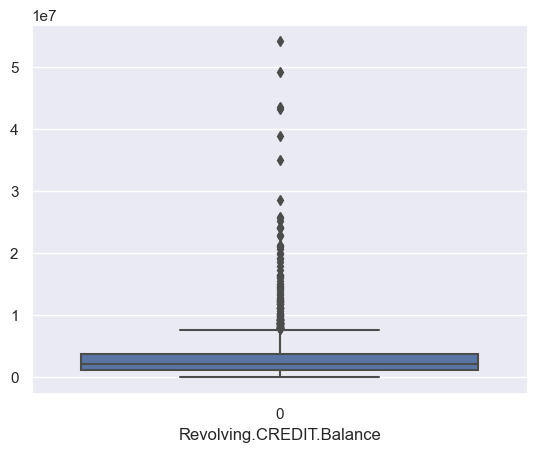

Inquiries.in.the.Last.6.Months


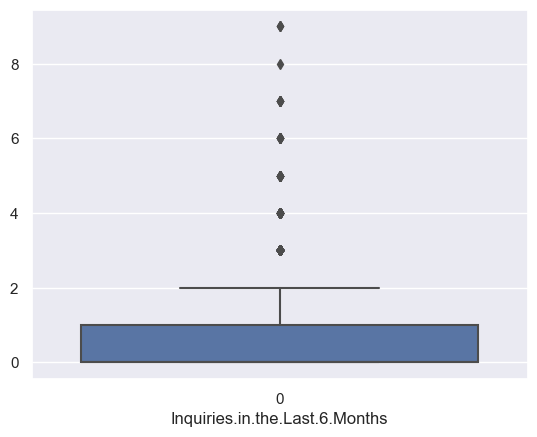

Crif Score


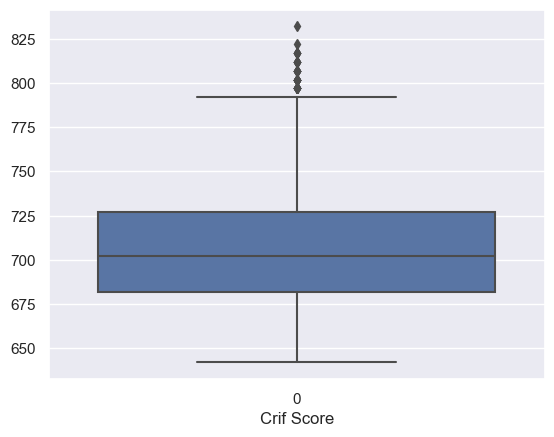

Loan.Purpose_Corporate Receivable Finance


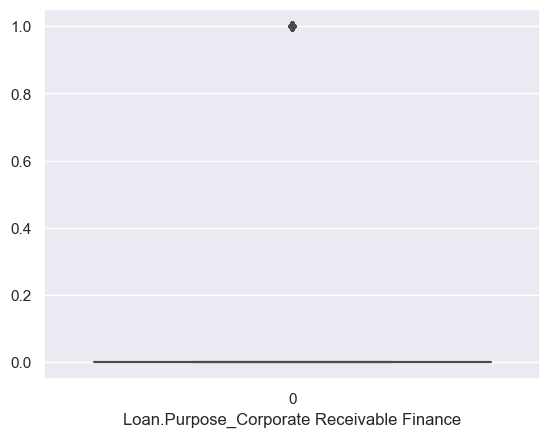

Loan.Purpose_Inventory Finance


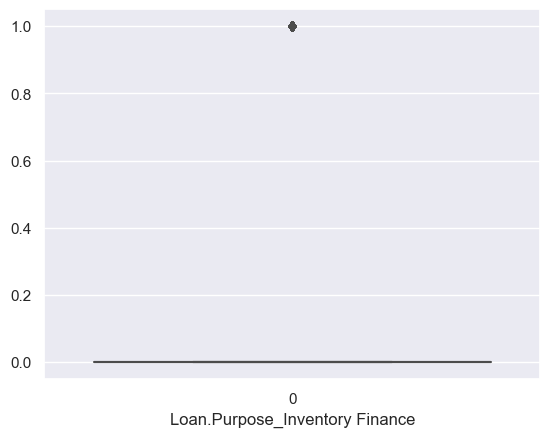

Loan.Purpose_Invoice Finance


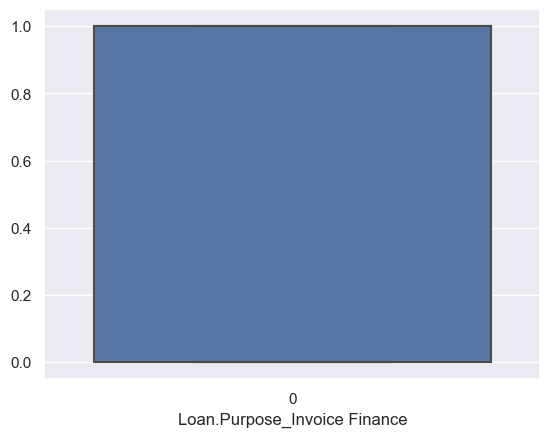

Loan.Length_60 months


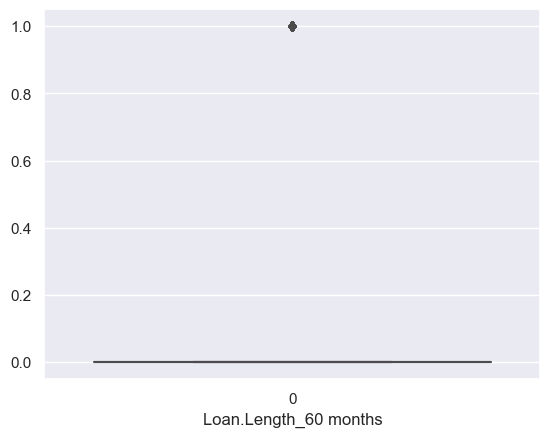

Home.Ownership_OWN


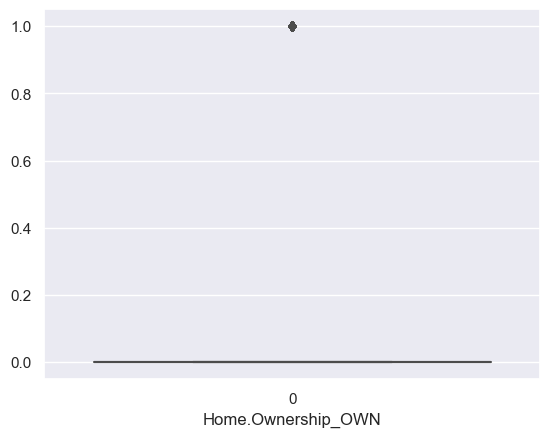

Home.Ownership_RENT


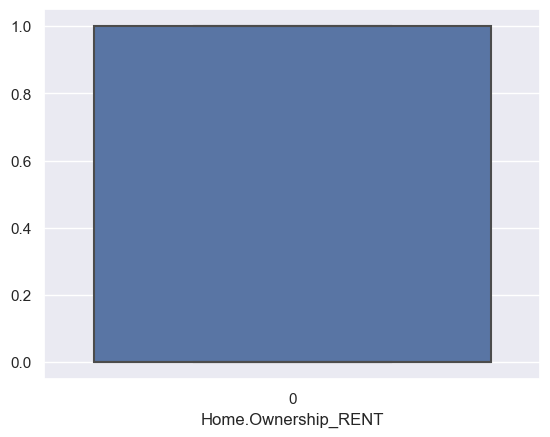

State_Delhi


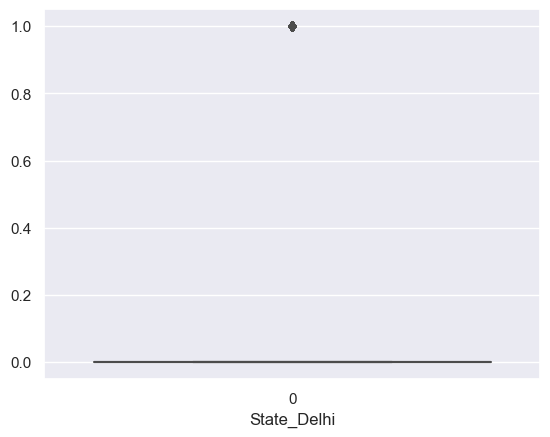

State_Gujarat


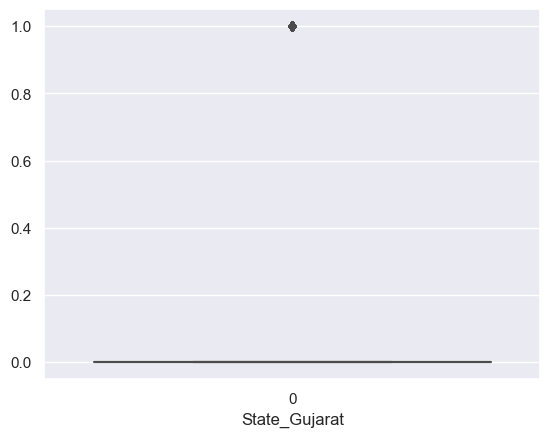

State_Karnataka


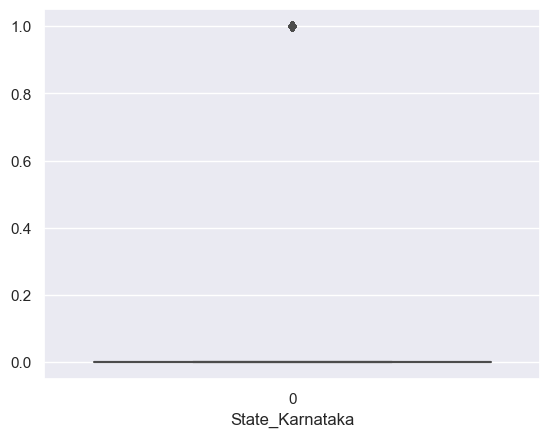

State_Kerala


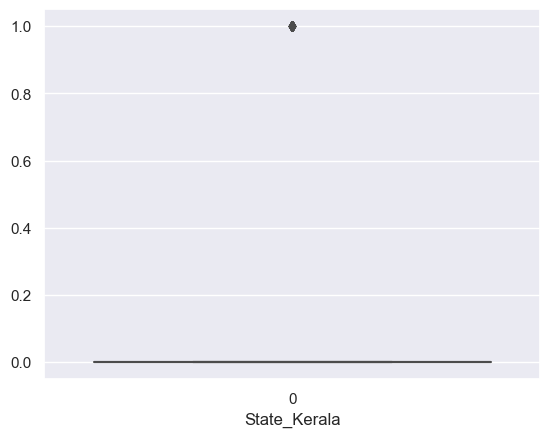

State_MH


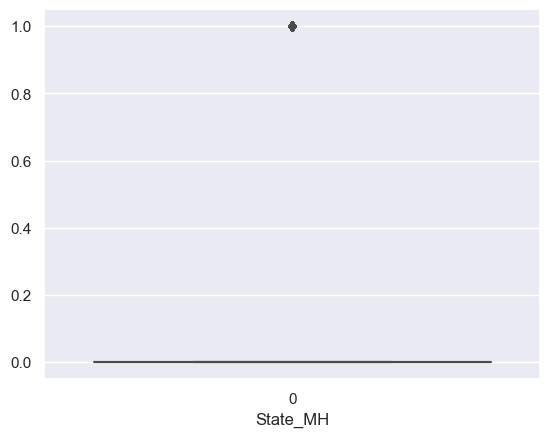

State_MP


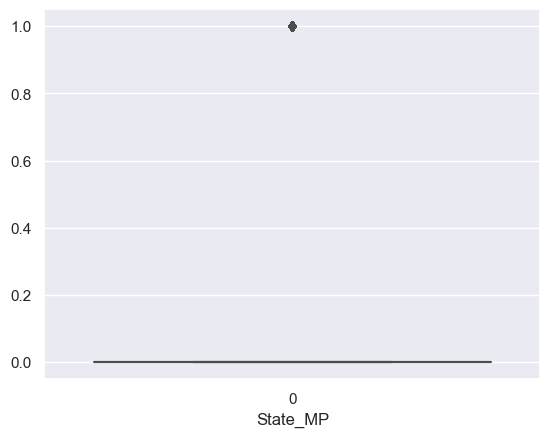

State_Odisha


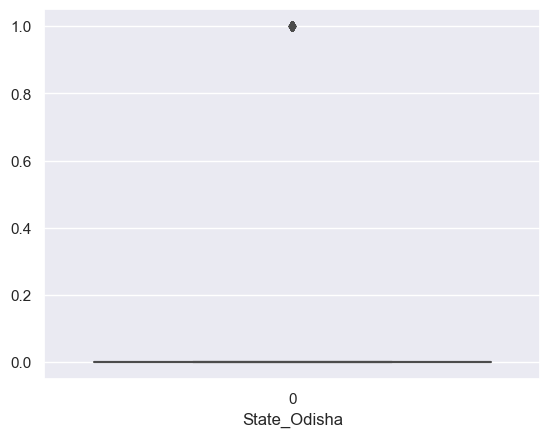

State_Tamilnadu


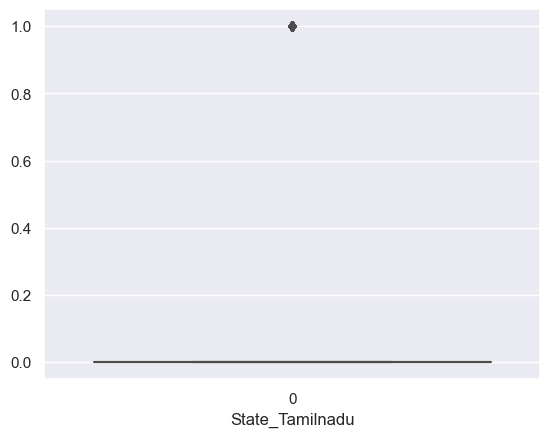

In [126]:
for i in col:
    box(i)

In [127]:
lm.predict(test)

array([ 3.13443324e+06,  4.09198781e+06,  1.41242530e+06,  1.94879747e+06,
        2.65457881e+05,  3.03288013e+05,  7.07122643e+05,  6.33152528e+04,
       -2.84822359e+05,  6.54211052e+05,  1.03397489e+06,  2.65331155e+06,
        1.47534458e+06,  1.48109213e+06,  4.99745132e+05,  8.57111244e+05,
       -2.33075608e+05,  1.09777217e+06,  1.56996014e+06,  1.36251968e+06,
        1.22211100e+06,  7.07083354e+04,  1.04877878e+05,  1.24432688e+06,
        2.03261130e+06,  6.10278212e+05,  9.39474167e+05,  8.42242407e+05,
       -2.84446094e+05,  2.41815489e+05,  2.28884687e+06,  1.30828933e+06,
        1.05911726e+06,  9.38654734e+05,  1.21728184e+06,  7.36990080e+05,
        1.31423386e+06, -1.00122203e+05,  5.95950982e+05, -1.09202510e+06,
        1.63188490e+06, -1.53750652e+05,  2.08848471e+05,  3.63976085e+06,
        8.45235641e+05,  1.47420680e+06,  5.33535157e+05,  1.28561713e+06,
        3.64845152e+05,  1.37535068e+06,  1.18284661e+05, -5.25666362e+05,
        5.00403371e+05,  

In [132]:
result=pd.DataFrame({'Interest.rate':model.predict(test)})
result

,Interest.rate
0,27.558353
1,24.003856
2,17.167940
3,22.800975
4,16.123464
...,...
295,19.589489
296,19.820037
297,24.953198
298,27.473897


In [136]:
test['Interest.Rate']=result

In [137]:
test.head()

,Amount.Requested,Amount.Funded.By.Investors,Debt.To.Income.Ratio,Turn Over,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Crif Score,Loan.Purpose_Corporate Receivable Finance,Loan.Purpose_Inventory Finance,...,Home.Ownership_RENT,State_Delhi,State_Gujarat,State_Karnataka,State_Kerala,State_MH,State_MP,State_Odisha,State_Tamilnadu,Interest.Rate
0,4000000.0,3995000.0,20.91,9833340,16.0,32137.0,2.0,667.0,0,0,...,0,0,0,0,1,0,0,0,0,27.558353
1,4985000.0,4985000.0,8.51,10500000,7.0,15288.0,0.0,712.0,0,0,...,0,0,0,0,1,0,0,0,0,24.003856
2,2200000.0,2190000.0,22.38,8400000,6.0,8694.0,4.0,762.0,1,0,...,0,0,0,0,1,0,0,0,0,17.167940
3,2540000.0,2540000.0,23.94,6666660,14.0,9655.0,3.0,687.0,0,0,...,0,0,0,0,1,0,0,0,0,22.800975
4,1000000.0,1000000.0,8.51,7500000,12.0,3998.0,0.0,747.0,0,0,...,0,0,0,0,1,0,0,0,0,16.123464


In [145]:
test.to_excel('result.xlsx')